In [2]:
import altair as alt
from vega_datasets import data

source = data.seattle_weather()

### Bars

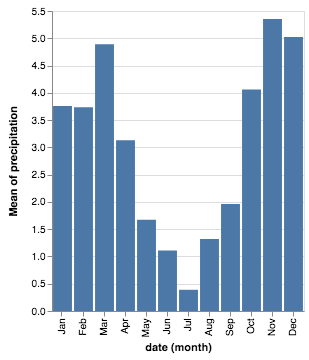

In [4]:
bar = alt.Chart(source).mark_bar().encode(
    x='month(date):O',
    y='mean(precipitation):Q'
)

bar

### Layered Bar Chart with Line as Mean

[source](https://altair-viz.github.io/gallery/mean_overlay_over_precipitiation_chart.html)

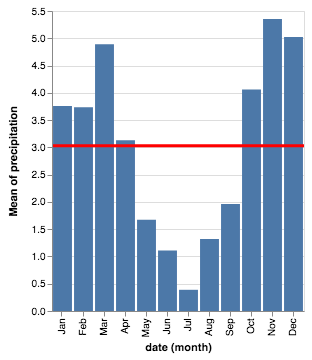

In [3]:
bar = alt.Chart(source).mark_bar().encode(
    x='month(date):O',
    y='mean(precipitation):Q'
)

rule = alt.Chart(source).mark_rule(color='red').encode(
    y='mean(precipitation)',
    size=alt.value(3)
)

bar + rule

### Bars with interactive average

[source](https://altair-viz.github.io/gallery/selection_layer_bar_month.html)

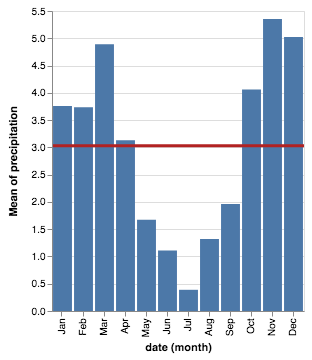

In [1]:

brush = alt.selection(type='interval', encodings=['x'])

bars = alt.Chart().mark_bar().encode(
    x='month(date):O',
    y='mean(precipitation):Q',
    opacity=alt.condition(brush, alt.OpacityValue(1), alt.OpacityValue(0.7))
).add_selection(
    brush
)

line = alt.Chart().mark_rule(color='firebrick').encode(
    y='mean(precipitation):Q',
    size=alt.SizeValue(3)
).transform_filter(
    brush
)

alt.layer(bars, line, data=source)
